In [6]:
import pandas as pd

# Load train data
data = pd.read_csv('../data/ml/hotel_reservations_train.csv')
X_train = data.drop('booking_status', axis=1)
y_train = data['booking_status']


In [7]:
# Load test data
data = pd.read_csv('../data/ml/hotel_reservations_test.csv')
X_test = data.drop('booking_status', axis=1)
y_test = data['booking_status']

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [9]:
# Make Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=42, solver='lbfgs',
                            max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                            l1_ratio=None)

# Train model
model_lr.fit(X_train, y_train)

# Use predict method on test data
y_pred_lr = model_lr.predict(X_test)

In [11]:
model_lr

LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
Balanced Accuracy: 0.76
ROC AUC: 0.76


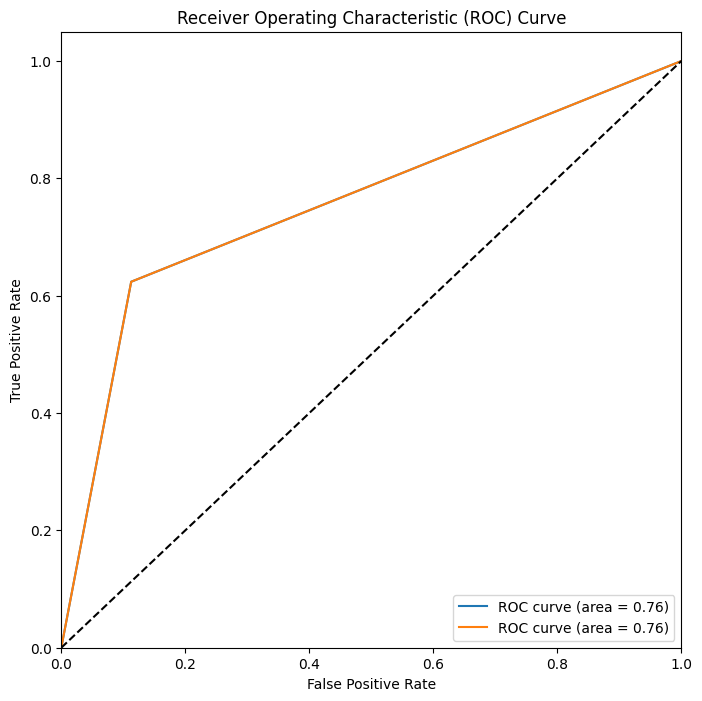

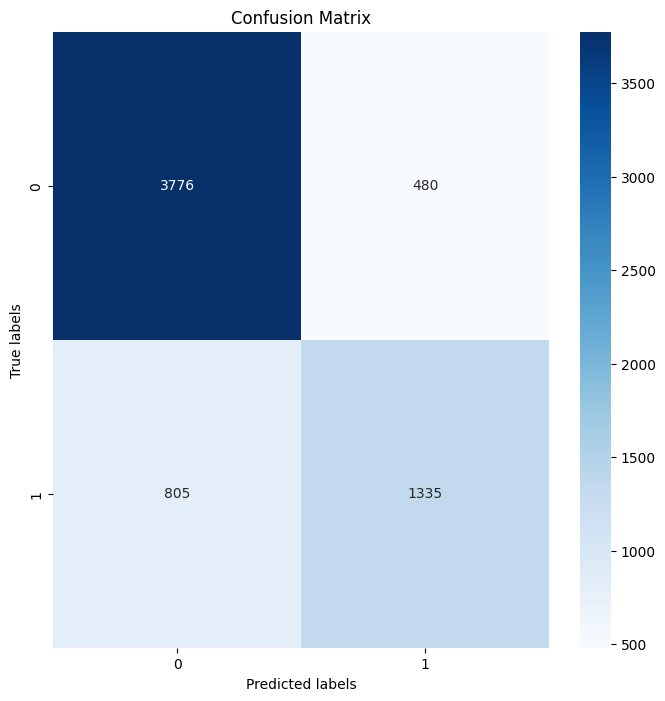

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4256
           1       0.74      0.62      0.68      2140

    accuracy                           0.80      6396
   macro avg       0.78      0.76      0.76      6396
weighted avg       0.79      0.80      0.79      6396



In [10]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, y_pred_lr, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, y_pred_lr, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_pred_lr, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_lr, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_lr)
    roc_auc[i] = roc_auc_score(y_test, y_pred_lr)
    
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_lr.png')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.savefig('../reports/images/confusion_matrix_lr.png')
plt.show()

# Compute the classification report
cr = classification_report(y_test, y_pred_lr)
print(cr)